In [2]:
from google.colab import files
uploaded = files.upload()


Saving Restaurant_Reviews.tsv to Restaurant_Reviews.tsv


In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [5]:
df.shape

(1000, 2)

In [6]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [7]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Liked'].plot(kind='hist', bins=20, title='Liked')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='Liked', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Liked']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Review')):
  _plot_series(series, series_name, i)
  fig.legend(title='Review', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Liked')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Review')):
  _plot_series(series, series_name, i)
  fig.legend(title='Review', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Liked'].plot(kind='line', figsize=(8, 4), title='Liked')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Review'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='Review', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Review'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Liked', y='Review', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [8]:
# Importing essential libraries for performing Natural Language Processing on 'Restaurant_Reviews.tsv' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
# Cleaning the reviews
corpus = []
for i in range(0,1000):

  # Cleaning special character from the reviews
  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=df['Review'][i])

  # Converting the entire review into lower case
  review = review.lower()

  # Tokenizing the review by words
  review_words = review.split()

  # Removing the stop words
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

  # Stemming the words
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]

  # Joining the stemmed words
  review = ' '.join(review)

  # Creating a corpus
  corpus.append(review)

In [10]:
corpus[0:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

In [11]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [13]:

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [14]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [15]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 76.5%
Precision score is: 0.76
Recall score is: 0.79


In [16]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [17]:

cm

array([[72, 25],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual values')

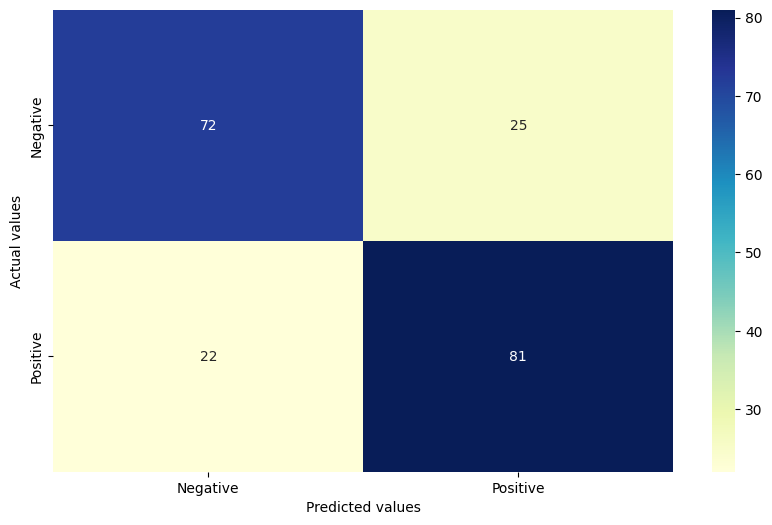

In [18]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [19]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))


Accuracy score for alpha=0.1 is: 78.0%
Accuracy score for alpha=0.2 is: 78.5%
Accuracy score for alpha=0.3 is: 78.0%
Accuracy score for alpha=0.4 is: 78.0%
Accuracy score for alpha=0.5 is: 77.5%
Accuracy score for alpha=0.6 is: 77.5%
Accuracy score for alpha=0.7 is: 77.5%
Accuracy score for alpha=0.8 is: 77.0%
Accuracy score for alpha=0.9 is: 76.5%
Accuracy score for alpha=1.0 is: 76.5%
--------------------------------------------
The best accuracy is 78.5% with alpha value as 0.2


In [20]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)


MultinomialNB(alpha=0.2)

In [21]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [22]:
# Predicting values
sample_review = 'The food is really good here.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [23]:

# Predicting values
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [24]:

# Predicting values
sample_review = 'A very classy nice restaurant. A warm welcoming, followed by an excellent service, with a lot of attention to details on order to please you.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [25]:
from ipywidgets import widgets
from IPython.display import display
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)

    # Transform the review using the CountVectorizer and make a prediction
    temp = cv.transform([final_review]).toarray()
    result = classifier.predict(temp)
    return "This is a POSITIVE review." if result else "This is a NEGATIVE review!"

In [28]:
review_textbox = widgets.Text(
    description='Review:',
    placeholder='Type a review here...',
    layout=widgets.Layout(width='400px')
)

In [29]:
predict_button = widgets.Button(description="Predict Sentiment")

In [30]:
output = widgets.Output()


In [31]:
def on_button_click(b):
    with output:
        output.clear_output()  # Clear previous output
        review = review_textbox.value
        prediction = predict_sentiment(review)
        print(prediction)

In [32]:
predict_button.on_click(on_button_click)

In [33]:
display(review_textbox, predict_button, output)

Text(value='', description='Review:', layout=Layout(width='400px'), placeholder='Type a review here...')

Button(description='Predict Sentiment', style=ButtonStyle())

Output()